In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
data = pd.read_csv(os.path.join(os.getcwd(), 'data', 'student_scores.csv'))

In [4]:
data.shape

(25, 2)

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


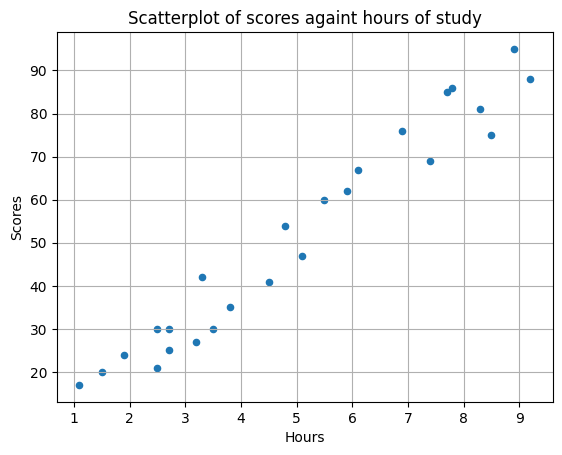

In [6]:
data.plot.scatter(x='Hours', y='Scores', title='Scatterplot of scores againt hours of study', grid=True);

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [29]:
X = data['Hours'].values.reshape(-1, 1)
y = data['Scores'].values
X.shape, y.shape

((25, 1), (25,))

In [32]:
# Splitting in training and testing set
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=SEED)

In [62]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Model equation: {model.coef_[0]:.2f}x + {model.intercept_:.2f}\n')
for x, true, pred in zip(X_test, y_test, y_pred):
    print(f'X (hours): {x[0]}, true score: {true}, predicted score: {pred:.0f}')
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'\nModel evaluation: MAE = {mae}. MSE = {mse}')

Model equation: 9.73x + 2.44

X (hours): 4.8, true score: 54, predicted score: 49
X (hours): 7.8, true score: 86, predicted score: 78
X (hours): 7.4, true score: 69, predicted score: 74

Model evaluation: MAE = 5.992166175615625. MSE = 37.3919507514802


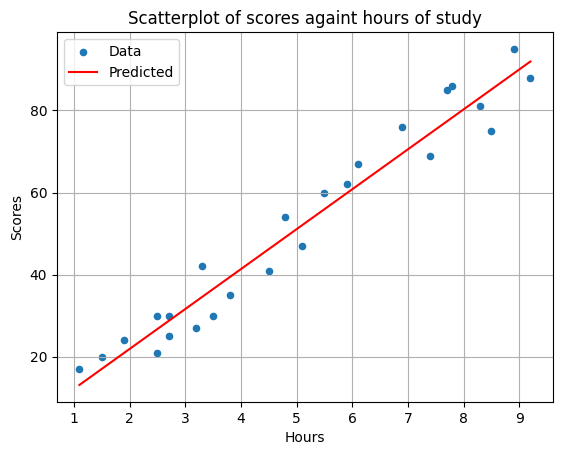

In [57]:
data.plot.scatter(x='Hours', y='Scores', title='Scatterplot of scores againt hours of study', grid=True, label='Data')
support = np.linspace(X.min(), X.max()).reshape(-1, 1)
preds = model.predict(support)
plt.plot(support, preds, color='red', label='Predicted')
plt.legend()